</div>
<center>
<div class="figure" >
  <img src="https://www.ufpb.br/educacaofinanceira/contents/imagens/brasoes-universidades/ufpa.png/@@images/image.png" width="8%">
</div>
<center/>
</div>

Universidade Federal do Pará\
Campus Universitário de Tucuruí\
Faculdade de Engenharia Elétrica


TCC - Material Identificação de sistemas Aplicado ao Aeropêndulo

Orientador:

    Raphael Teixeira


Discente:

    Oséias Dias de Farias

<br>

## **<center> Modelagem de sistema por função de transferência pulsada - Identificação Aeropêndulo</center>**


### Resumo teórico sobre Identificação de Sistemas

## Resumo teórico sobre Identificação de Sistemas

Uma função de tranferência no domínio $z$ de ordem $N$ pode ser expressa da seguinte forma:

$$ H(z) = \frac{Y(z)}{X(z)} = \frac{\sum\limits_{m=1}^{M}b_m z^{-m}}
{1 + \sum\limits_{n=1}^{N}a_nz^{-n}} \tag{1}$$

Em que $X(z)$ e $Y(z)$  representam a transformada $z$ dos sinais de entada e de saída, respectivamente.

Ao desenvolver os somatórios temos:

$$ H(z) = \frac{ b_1z^{-1}+\dotsb+b_{M} z^{-M}}
{1+a_1z^{-1}+\dotsb+a_Nz^{-N}} \tag{2}$$

Ao aplicar a transformada $z$ inversa, obtem-se a equação de diferenças equivalente,

$$ y[k] = -a_1y[k-1] - \dotsb - a_N y[k-N]
+ b_1 x[k - 1] + \dotsb + b_M x[k-N] \tag{3}$$

Observe que se tem um sistema de equações dado por:

$$ \mathbf{y = \Psi \theta} \tag{4}$$

em que $\mathbf{\Psi}$ é a matriz de regressores que é definida como segue,  

$$ \mathbf{\Psi} = \begin{bmatrix}
-y[k-1] & \dotsb & -y[k-N] & x[k-1] & \dotsb & x[k-M]
\end{bmatrix} \tag{5}$$

Ao expandir para uma quantidade $N_{a}$ de amostras, a equação (4) tem-se

$$ \begin{bmatrix} y[0]\\ y[1] \\ \vdots\\ y[N_a] \end{bmatrix} = \begin{bmatrix} -y[0-1] & \dotsb & -y[0-N] & x[0-1] & \dotsb & x[0-M]\\-y[1-1] & \dotsb & -y[1-N] &
 x[1-1] & \dotsb & x[1-M]\\ \vdots & \dotsb & \vdots &
\vdots & \dotsb & \vdots \\-y[N_a-1] & \dotsb & -y[N_a-N] &
x[N_a-1] & \dotsb & x[N_a-M]   \end{bmatrix} \begin{bmatrix} a_1\\ \vdots\\ a_N\\ b_1\\ \vdots\\ b_M \end{bmatrix}$$

A matriz $\Psi$ é denomida de matriz de regressores por ser formada (no porcesso de construção) pelos termos do modelo (equação de diferenças) referentes aos sinais de entrada e de saída atrasados no tempo discreto. 

OBS: o coeficiente $b_0$ é zero, o que indica nenhuma conexão direta entre a entrada e a saída do sistema.

O vetor $\mathbf{\theta}$ é o vetor de coeficientes, definido como segue,

$$ \mathbf{\theta} = \begin{bmatrix} a_1\\ \vdots\\ a_N\\ b_1\\ \vdots\\ b_M \end{bmatrix} \tag{6}$$

e $\mathbf{y}$ é o vetor de saída no instante de tempo atual (k) . 

Para cada instante de tempo tem-se uma equação distinta, formando um sistema sobredeterminado, o que implica que não há solução exata. Para fins de práticos, uma aproximação é o suficiente. 

Observe que o problema de identificação é formulado de tal forma que os vetores de entrada e saída são conhecidos a partir dos sinais, dessa forma deve-se detrminar o vetor de coeficientes.

<p align='justify'>Para determinar o vetor de coeficientes utiliza-se o sistema de equações para formular um problema de mínimos quadrados, obtendo assim a seguinte expressão:</p>

$$ \mathbf{\theta}^{*} = \mathbf{\left(\Psi^T\Psi \right)^{-1}\Psi^Ty} \tag{7}$$

<p align='justify'>Após determinar o vetor de coeficientes pode-se substituir os valores obtidos na função de transferência proposta inicialmente e definir o modelo.</p>



## Solução por otimização:

$$J_2(\zeta) = ||A\zeta - y||_2$$

## Validação do modelo

<p align='justify'>Tipicamente em Identificação de Sistemas, sempre que levantado um modelo deve-se valida-lo, pois é crucial analisar se o mesmo de fato descreve de maneira aproximada a dinâmica do sistema.</p>

<p align='justify'>Existem diversos métodos para validar um modelo, aqui iremos optar por utilizar uma métrica chamada Erro Quadrático Médio (EQM). Esse método consiste em calcular a média das diferenças ao quadrado entre o sinal observado e o sinal predito, que resulta na seguite expressão:</p>

Métrica NRMSE

$$ NRMSE = \Big(1 - \frac{\sum(y - y_p)^2}{\sum(y - \mu_y)^2} \Big)\cdot 100\%$$


onde $N_a$ é número de amostra dos dados, $y_i$ é a $i$-ésima amostra do sinal observado e $\hat{y}_i$ é a $i$-ésima amostra do sinal predito pelo modelo. No geral quanto menor for o valor do EQM, mais a resposta do modelo se aproxima ao sistema real.

### Aplicando Identificação de sistemas o Aeropêndulo

In [1]:
import matplotlib.pyplot as plt

import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import control as ct
import scipy
import scipy.signal as sg
from control.matlab import *
from sklearn.metrics import mean_squared_error
import scienceplots

%config InlineBackend.figure_format='retina'
plt.style.use(["science", "notebook"])


SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

### **Importando as bibliotecas usadas para a análise**

In [2]:
# url_data = (r"https://raw.githubusercontent.com/Oseiasdfarias/Projeto_Tcc_Oseias_Oficial/main/interface_aeropendulo/interface/dados_de_ensaio/arquivo_24_6_2023_21_14_28.csv")
# file = "../../interface_aeropendulo/interface/dados_de_ensaio/arquivo_24_6_2023_21_14_28.csv"
file = "../../interface_aeropendulo/interface/dados_de_ensaio/arquivo_25_6_2023_15_53_41.csv"
dados_malha_aberta = pd.read_csv(file, header=None, sep=',').values
dados_malha_aberta[0][0] = 0.0
dados_malha_aberta

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 4.00000e+00,
        5.00000e+00, 6.00000e+00],
       [0.00000e+00, 0.00000e+00, 1.96480e+01, ..., 1.00000e+00,
        1.00000e+00, 3.44000e+00],
       [1.00000e+00, 0.00000e+00, 1.98460e+01, ..., 1.00000e+00,
        1.00000e+00, 3.46000e+00],
       ...,
       [6.38600e+03, 0.00000e+00, 4.27910e+01, ..., 1.50000e+00,
        1.50000e+00, 1.31151e+02],
       [6.38700e+03, 0.00000e+00, 4.42420e+01, ..., 1.50000e+00,
        1.50000e+00, 1.31171e+02],
       [6.38800e+03, 0.00000e+00, 4.25930e+01, ..., 1.50000e+00,
        1.50000e+00, 1.31191e+02]])

### **Obtendo os sinais do ensaio**

In [3]:
tempo = np.array(dados_malha_aberta[:,7])
sinal_prbs_entrada  = np.array(dados_malha_aberta[:,6])
sinal_saida = np.array(dados_malha_aberta[:,2])

# Convertendo o sinal de Graus para Radianos
sinal_saida = np.deg2rad(sinal_saida)
tempo = tempo - min(tempo)

## Plotagem dos sinais

###  **Sinais de Entrada e de Saída**

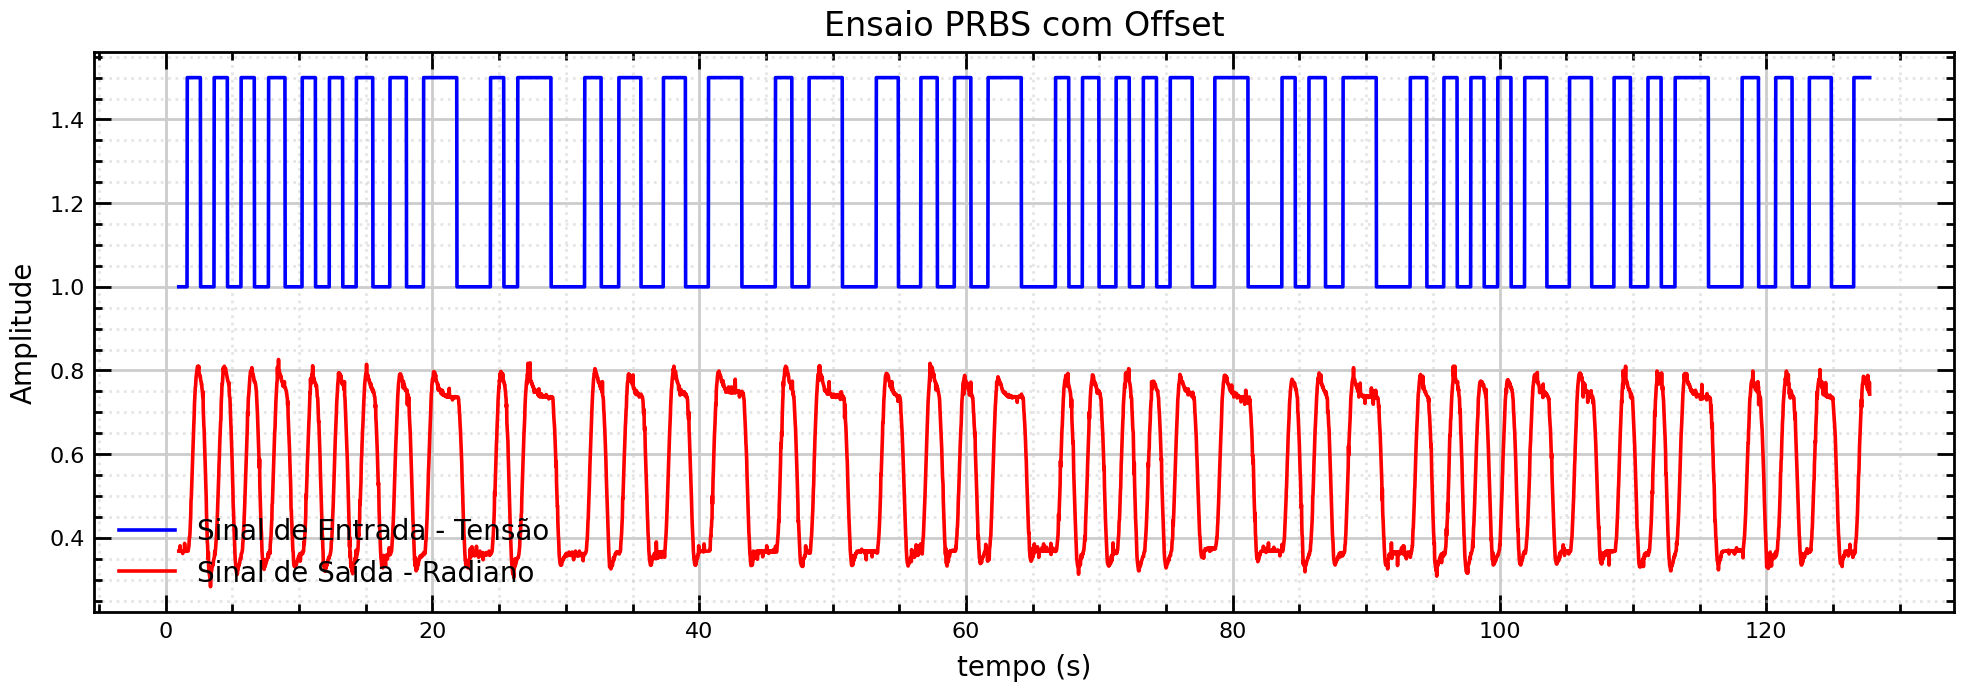

In [4]:
plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.plot(tempo[50:], sinal_prbs_entrada[50:],
         c = 'b', lw=1.3, label = "Sinal de Entrada - Tensão")
plt.plot(tempo[50:], (sinal_saida[50:]),
         c = 'r', lw=1.3, label = "Sinal de Saída - Radiano")

plt. title('Ensaio PRBS com Offset', fontsize=12)
plt.ylabel('Amplitude', fontsize=10)
plt.xlabel('tempo (s)', fontsize=10)
plt.legend(fontsize=10)

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.show()

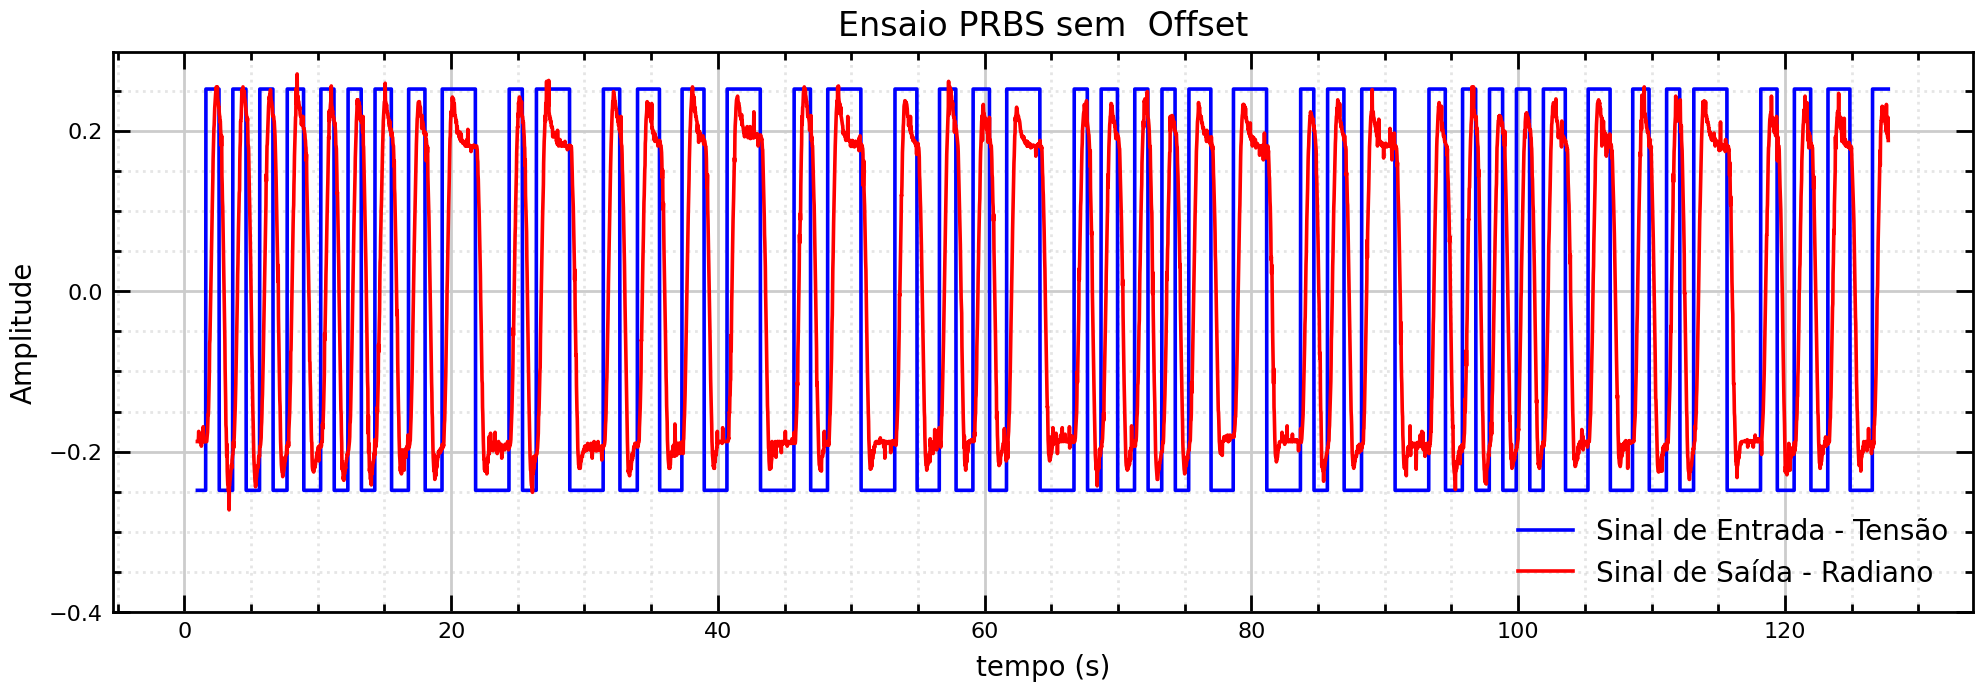

In [5]:
plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.plot(tempo[50:], sinal_prbs_entrada[50:] - np.mean(sinal_prbs_entrada[50:]),
         c = 'b', lw=1.3, label = "Sinal de Entrada - Tensão")
plt.plot(tempo[50:], (sinal_saida[50:]) - np.mean((sinal_saida[50:])),
         c = 'r', lw=1.3, label = "Sinal de Saída - Radiano")

plt. title('Ensaio PRBS sem  Offset', fontsize=12)
plt.ylabel('Amplitude', fontsize=10)
plt.xlabel('tempo (s)', fontsize=10)
plt.legend(fontsize=10)
plt.yticks(np.arange(-0.4, 0.4, 0.2))

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.show()

In [6]:
N = len(sinal_prbs_entrada)

In [7]:
percIdent = 0.6             # Percentual dos dados de identificação:
Ni = int(percIdent * N)     # Quantidade de amostras para identificação:
Ni

3834

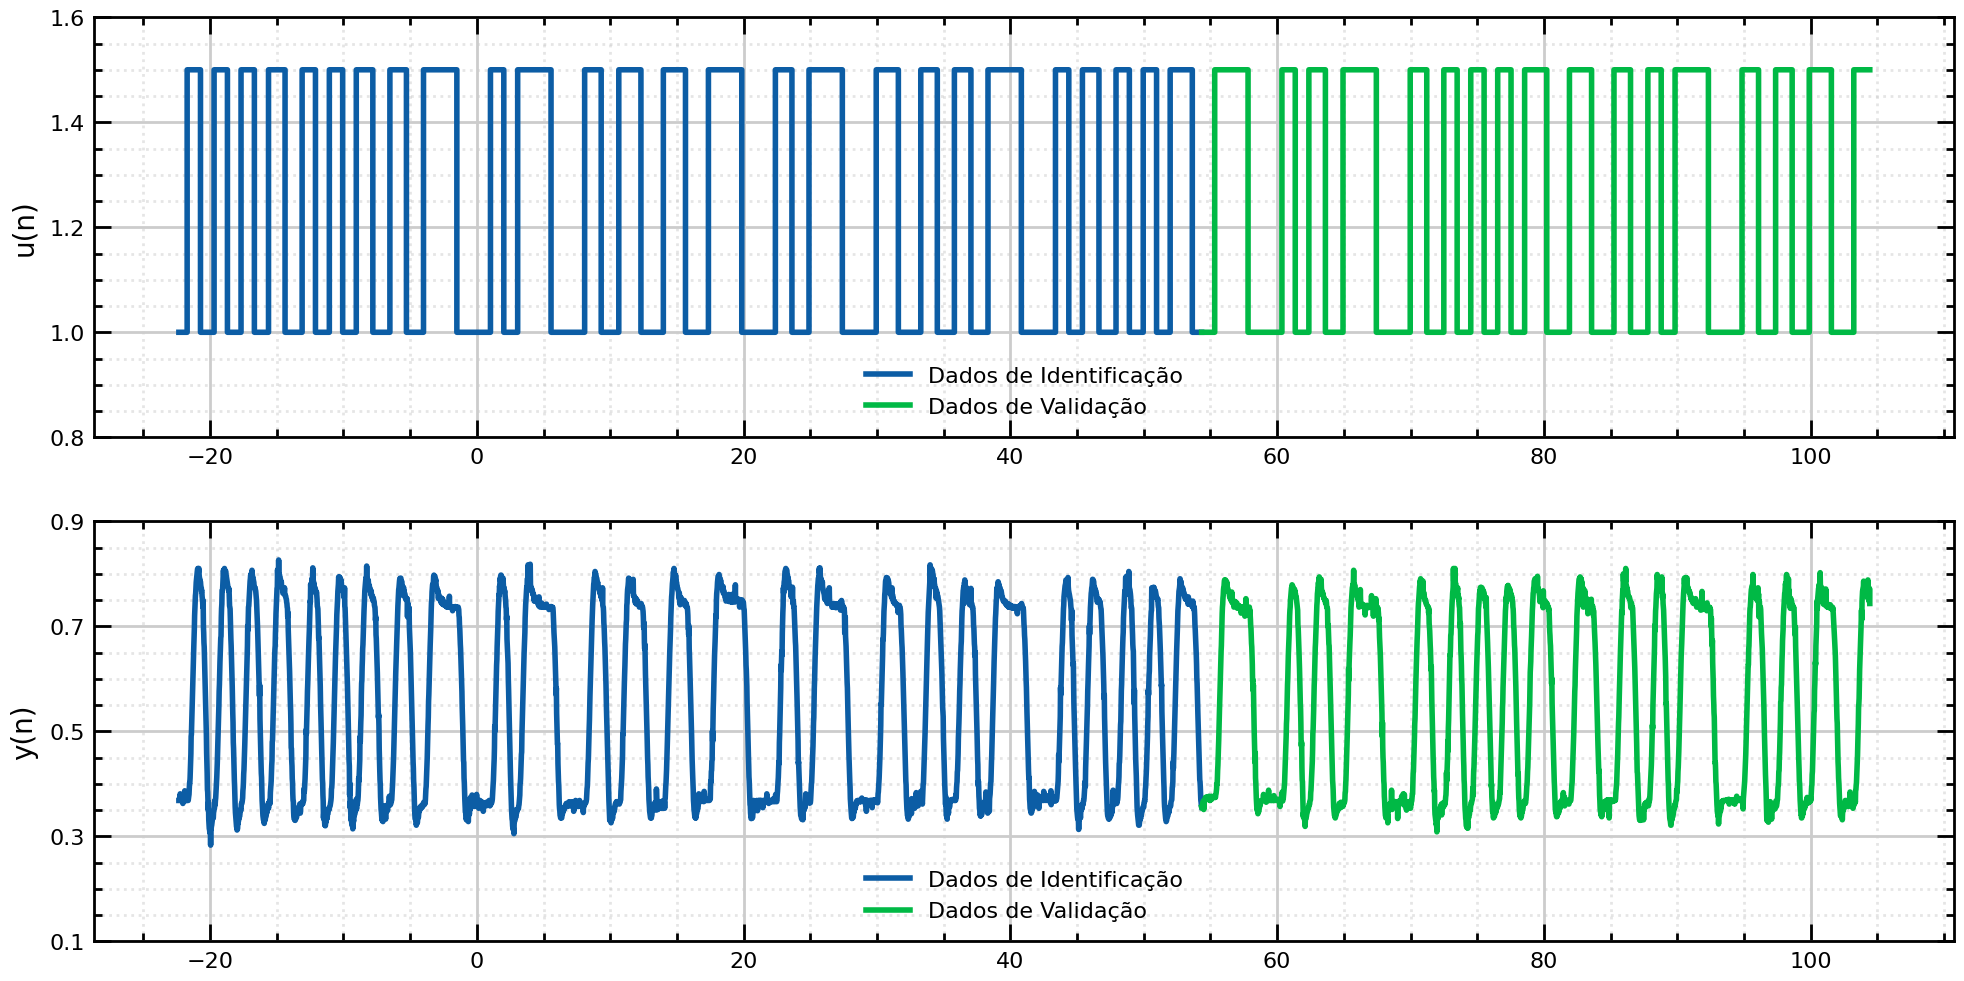

In [8]:
u1 = sinal_prbs_entrada[50:]
yout = sinal_saida[50:]
t = tempo[50:] - 23.32

plt.figure(figsize = (12,6))
plt.subplot(211)
plt.step(t[:Ni+1], u1[:Ni+1], label='Dados de Identificação')
plt.step(t[Ni:], u1[Ni:], label='Dados de Validação')
plt.yticks(np.arange(0.8, 1.8, 0.2))
plt.ylabel('u(n)')
plt.legend(loc="lower center")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)


plt.subplot(212)
plt.plot(t[:Ni+1], yout[:Ni+1], label='Dados de Identificação')
plt.plot(t[Ni:], yout[Ni:], label='Dados de Validação')
plt.yticks(np.arange(0.1, 1, 0.2))
plt.ylabel('y(n)')
plt.legend(loc="lower center")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.show()

### Identificação usando um sistemas de segunda ordem

$$
    H(z) = \frac{b_1z^{-1}+b_2z^{-2}}
    {1+a_1z^{-1}+a_2z^{-2}} \tag{10}
$$



In [9]:
# Matriz de regressão:
nb = 3; na = 2
ni = np.arange(na, Ni + na)
M = np.zeros((Ni, na + nb))

# Para regressores de y:
for l in np.arange(0, na):
  M[:, l] = yout[ni - l - 1]

# Para regressores de u:
for l in np.arange(0, nb):
  M[:,na+l] = u1[ni-l]

print(M.shape)

# Mínimos quadrados
thetaA = np.linalg.inv(M.T@M)@M.T@yout[ni]
thetaA

(3834, 5)


array([ 1.33772964, -0.36044455, -0.00208096, -0.00218141,  0.01491148])

In [10]:
Ts = np.mean(np.diff(tempo))
Ts

0.01959477226483018

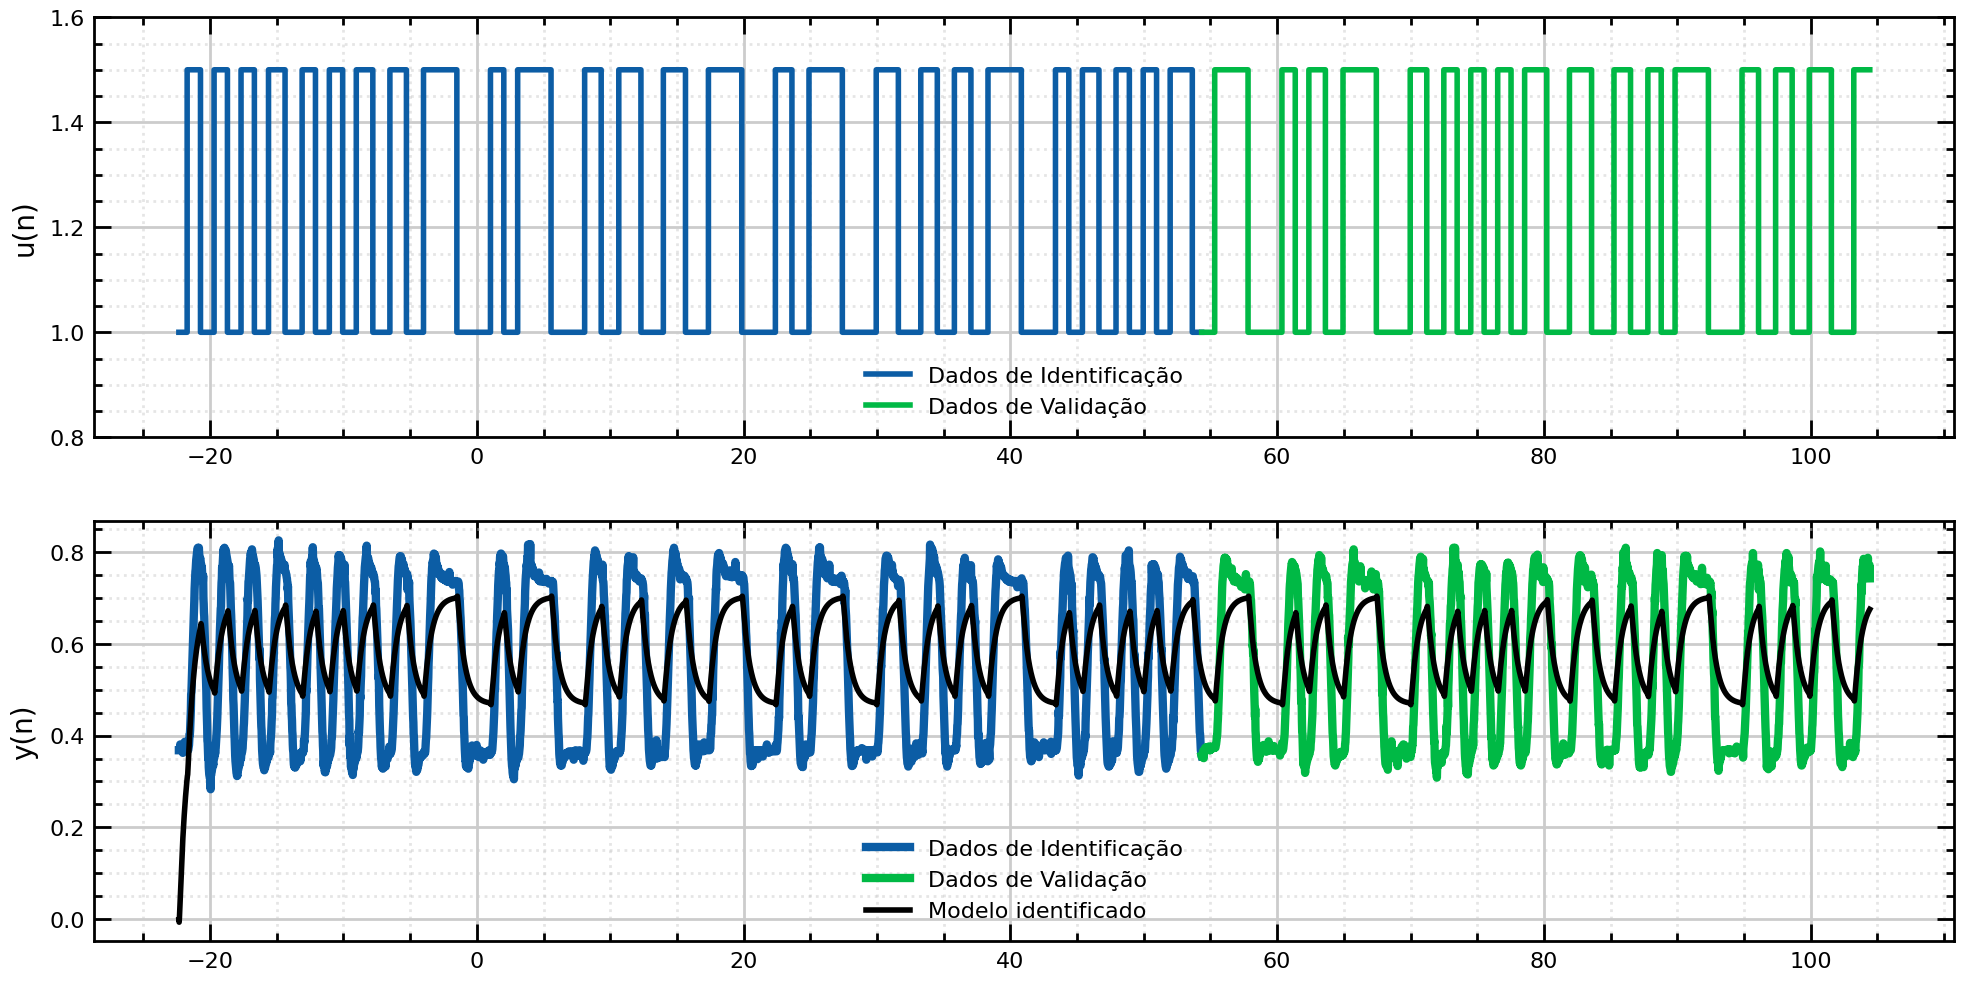

TransferFunction(array([-0.00208096, -0.00218141,  0.01491148]), array([ 1.        , -1.33772964,  0.36044455]), 0.01959477226483018)

In [11]:
a1, a2 = thetaA[:2]
b0, b1, b2 = thetaA[2:]

Ba = [b0 , b1, b2]
Aa = [1, -a1, -a2]

Gz = ct.tf(Ba, Aa, Ts)
_, yp = ct.forced_response(Gz, U=u1)

plt.figure(figsize = (12, 6))
plt.subplot(211)
plt.step(t[:Ni+1], u1[:Ni+1], label='Dados de Identificação')
plt.step(t[Ni:], u1[Ni:], label='Dados de Validação')
plt.yticks(np.arange(0.8, 1.8, 0.2))
plt.ylabel('u(n)')
plt.legend(loc="lower center")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.subplot(212)
plt.plot(t[:Ni+1], yout[:Ni+1], linewidth=3.0, label='Dados de Identificação')
plt.plot(t[Ni:], yout[Ni:], linewidth=3.0, label='Dados de Validação')
plt.plot(t, yp, 'k', label='Modelo identificado')
plt.ylabel('y(n)')
plt.legend(loc="lower center")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.show()

Gz

In [12]:
# Avaliação por NRMSE:
NRMSE = (1- np.sqrt(np.sum((yout[Ni:] - yp[Ni:])**2)) /\
         np.sqrt(np.sum((yout[Ni:] - np.mean(yout[Ni:]))**2)))*100
print('Ajuste: ', NRMSE.round(2),"%")


Ajuste:  35.21 %


In [13]:
def resposta_forcada_e_mse():
    # Calculo do EQM comparando os dados observados com preditos.
    MSE = mean_squared_error(yout[Ni:], yp[Ni:])
    print('\nErro médio quadrático: %.6f\n' % MSE)


In [14]:
resposta_forcada_e_mse()


Erro médio quadrático: 0.013323



## Solução por otimização:

$$J_2(\zeta) = ||A\zeta - y||_2$$

In [15]:
def J2(theta0, t):
    M,yi=t
    return np.sum(np.abs(M@theta0-yi))

In [16]:
yi = yout[ni]
dados = (M, yi)
theta0 = np.array([1, 1, 1, 1, 1]).reshape(5, 1)
thetaO = scipy.optimize.fmin(J2, theta0, args=(dados, ));

Optimization terminated successfully.
         Current function value: 135.451846
         Iterations: 518
         Function evaluations: 852


In [17]:
print('xia: ', thetaA)
print('xio: ', thetaO)

xia:  [ 1.33772964 -0.36044455 -0.00208096 -0.00218141  0.01491148]
xio:  [-2.95058648  3.88358774  0.00609961  0.05470505 -0.02927573]


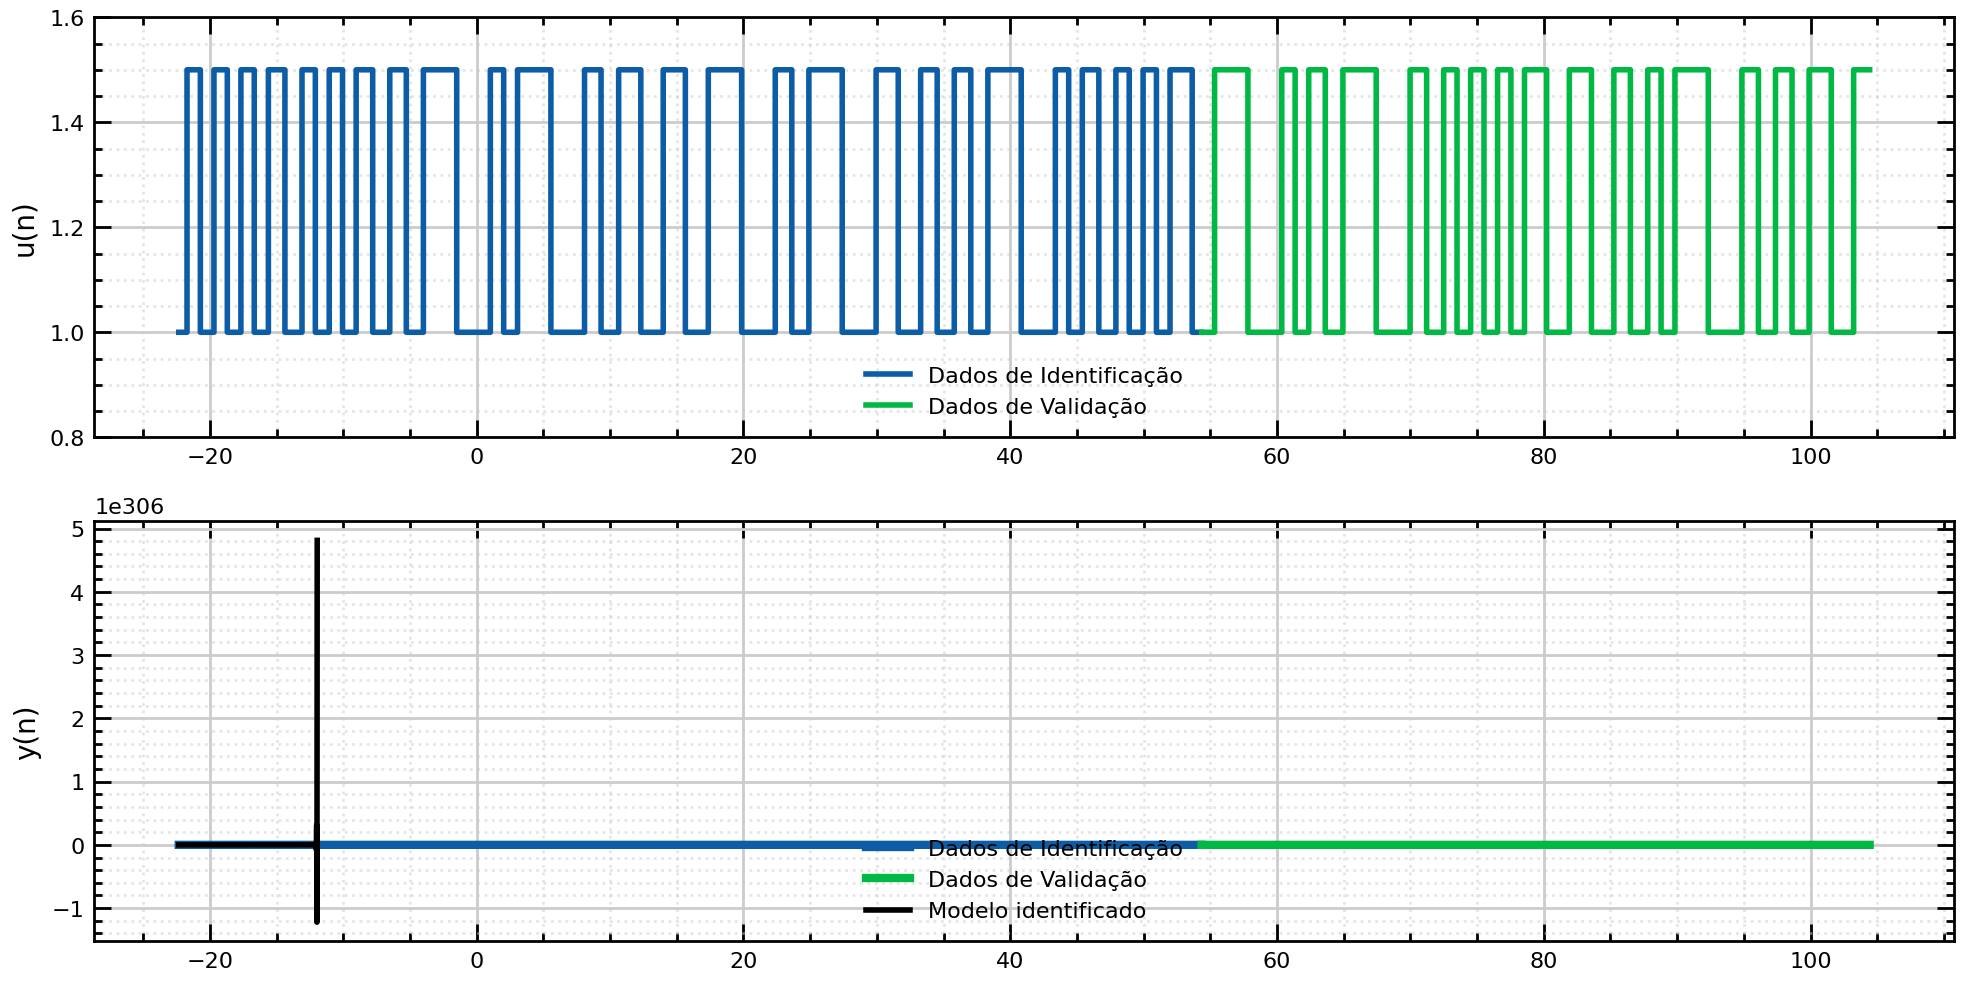

TransferFunction(array([ 0.00609961,  0.05470505, -0.02927573]), array([ 1.        ,  2.95058648, -3.88358774]), 0.01959477226483018)

In [18]:
a1, a2 = thetaO[:2]
b0, b1, b2 = thetaO[2:]

Ba = [b0 , b1, b2]
Aa = [1, -a1, -a2]

Gz = ct.tf(Ba, Aa, Ts)
_, yp = ct.forced_response(Gz, U=u1)

plt.figure(figsize = (12, 6))
plt.subplot(211)
plt.step(t[:Ni+1], u1[:Ni+1], label='Dados de Identificação')
plt.step(t[Ni:], u1[Ni:], label='Dados de Validação')
plt.yticks(np.arange(0.8, 1.8, 0.2))
plt.ylabel('u(n)')
plt.legend(loc="lower center")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.subplot(212)
plt.plot(t[:Ni+1], yout[:Ni+1], linewidth=3.0, label='Dados de Identificação')
plt.plot(t[Ni:], yout[Ni:], linewidth=3.0, label='Dados de Validação')
plt.plot(t, yp, 'k', label='Modelo identificado')
plt.ylabel('y(n)')
plt.legend(loc="lower center")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.show()

Gz

### Identificação usando um sistemas de quinta ordem

$$
    H(z) = \frac{b_1z^{-1}+b_2z^{-2}}
    {1+a_1z^{-1}+a_2z^{-2}+a_2z^{-3}+a_2z^{-4}+a_2z^{-5}}
$$



In [19]:
# Matriz de regressão:
nb = 2; na = 5
ni = np.arange(na, Ni + na)
M = np.zeros((Ni, na + nb))

# Para regressores de y:
for l in np.arange(0, na):
  M[:, l] = yout[ni - l - 1]

# Para regressores de u:
for l in np.arange(0, nb):
  M[:,na+l] = u1[ni-l]

print(M.shape)
# Mínimos quadrados
thetaA = np.linalg.inv(M.T@M)@M.T@yout[ni]
thetaA

(3834, 7)


array([ 0.79333995,  0.44947157,  0.15999951, -0.10055193, -0.31985428,
       -0.00195299,  0.0099259 ])

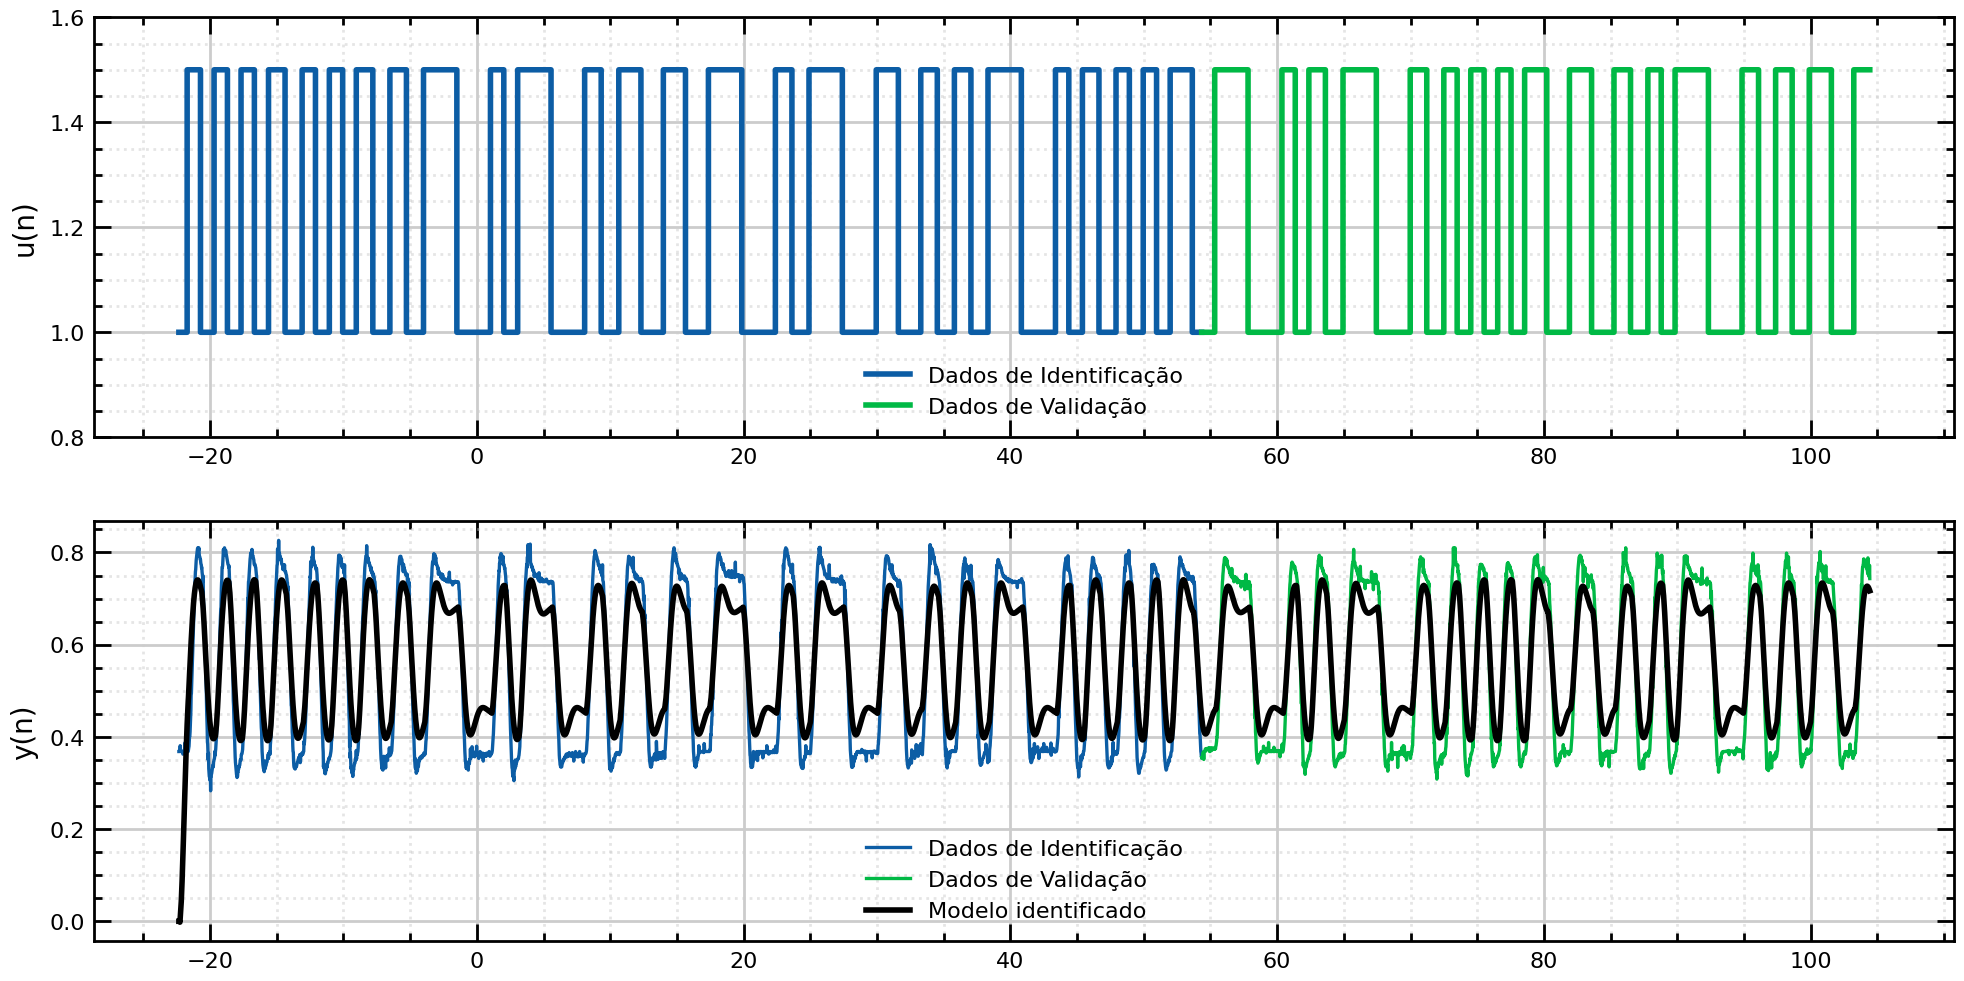

TransferFunction(array([-0.00195299,  0.0099259 ]), array([ 1.        , -0.79333995, -0.44947157, -0.15999951,  0.10055193,
        0.31985428]), 0.01959477226483018)

In [20]:
a1, a2, a3, a4, a5 = thetaA[:5]
b0, b1 = thetaA[5:]

Aa = [1, -a1, -a2, -a3, -a4, -a5]
Ba = [b0 , b1]

Gz = ct.tf(Ba, Aa, Ts)
_, yp = ct.forced_response(Gz, U=u1)

plt.figure(figsize = (12, 6))
plt.subplot(211)
plt.step(t[:Ni+1], u1[:Ni+1], label='Dados de Identificação')
plt.step(t[Ni:], u1[Ni:], label='Dados de Validação')
plt.yticks(np.arange(0.8, 1.8, 0.2))
plt.ylabel('u(n)')
plt.legend(loc="lower center")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)


plt.subplot(212)
plt.plot(t[:Ni+1], yout[:Ni+1], linewidth = 1.2, label='Dados de Identificação')
plt.plot(t[Ni:], yout[Ni:], linewidth = 1.2, label='Dados de Validação')
plt.plot(t, yp, 'k', label='Modelo identificado')
plt.legend(loc="lower center")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.ylabel('y(n)')
plt.show()

Gz

In [21]:
# Avaliação por NRMSE:
NRMSE = (1- np.sqrt(np.sum((yout[Ni:] - yp[Ni:])**2))/\
         np.sqrt(np.sum((yout[Ni:] - np.mean(yout[Ni:]))**2)))*100
print('\nAjuste: ', NRMSE.round(2),"%\n")


Ajuste:  64.41 %



In [22]:
resposta_forcada_e_mse()


Erro médio quadrático: 0.004021



In [23]:
# Matriz de regressão:
nb = 4
na = 10
ni = np.arange(na, Ni + na)
M = np.zeros((Ni, na + nb))

# Para regressores de y:
for l in np.arange(0, na):
  M[:, l] = yout[ni - l - 1]

# Para regressores de u:
for l in np.arange(0, nb):
  M[:,na+l] = u1[ni-l]

print(M.shape)
# Mínimos quadrados
thetaA = np.linalg.inv(M.T@M)@M.T@yout[ni]
thetaA

(3834, 14)


array([ 0.67022762,  0.40239362,  0.19483699,  0.03040075, -0.07364516,
       -0.08448662, -0.09063793, -0.10118527, -0.02810458,  0.05511044,
       -0.00335871, -0.00245693,  0.00276002,  0.01439076])

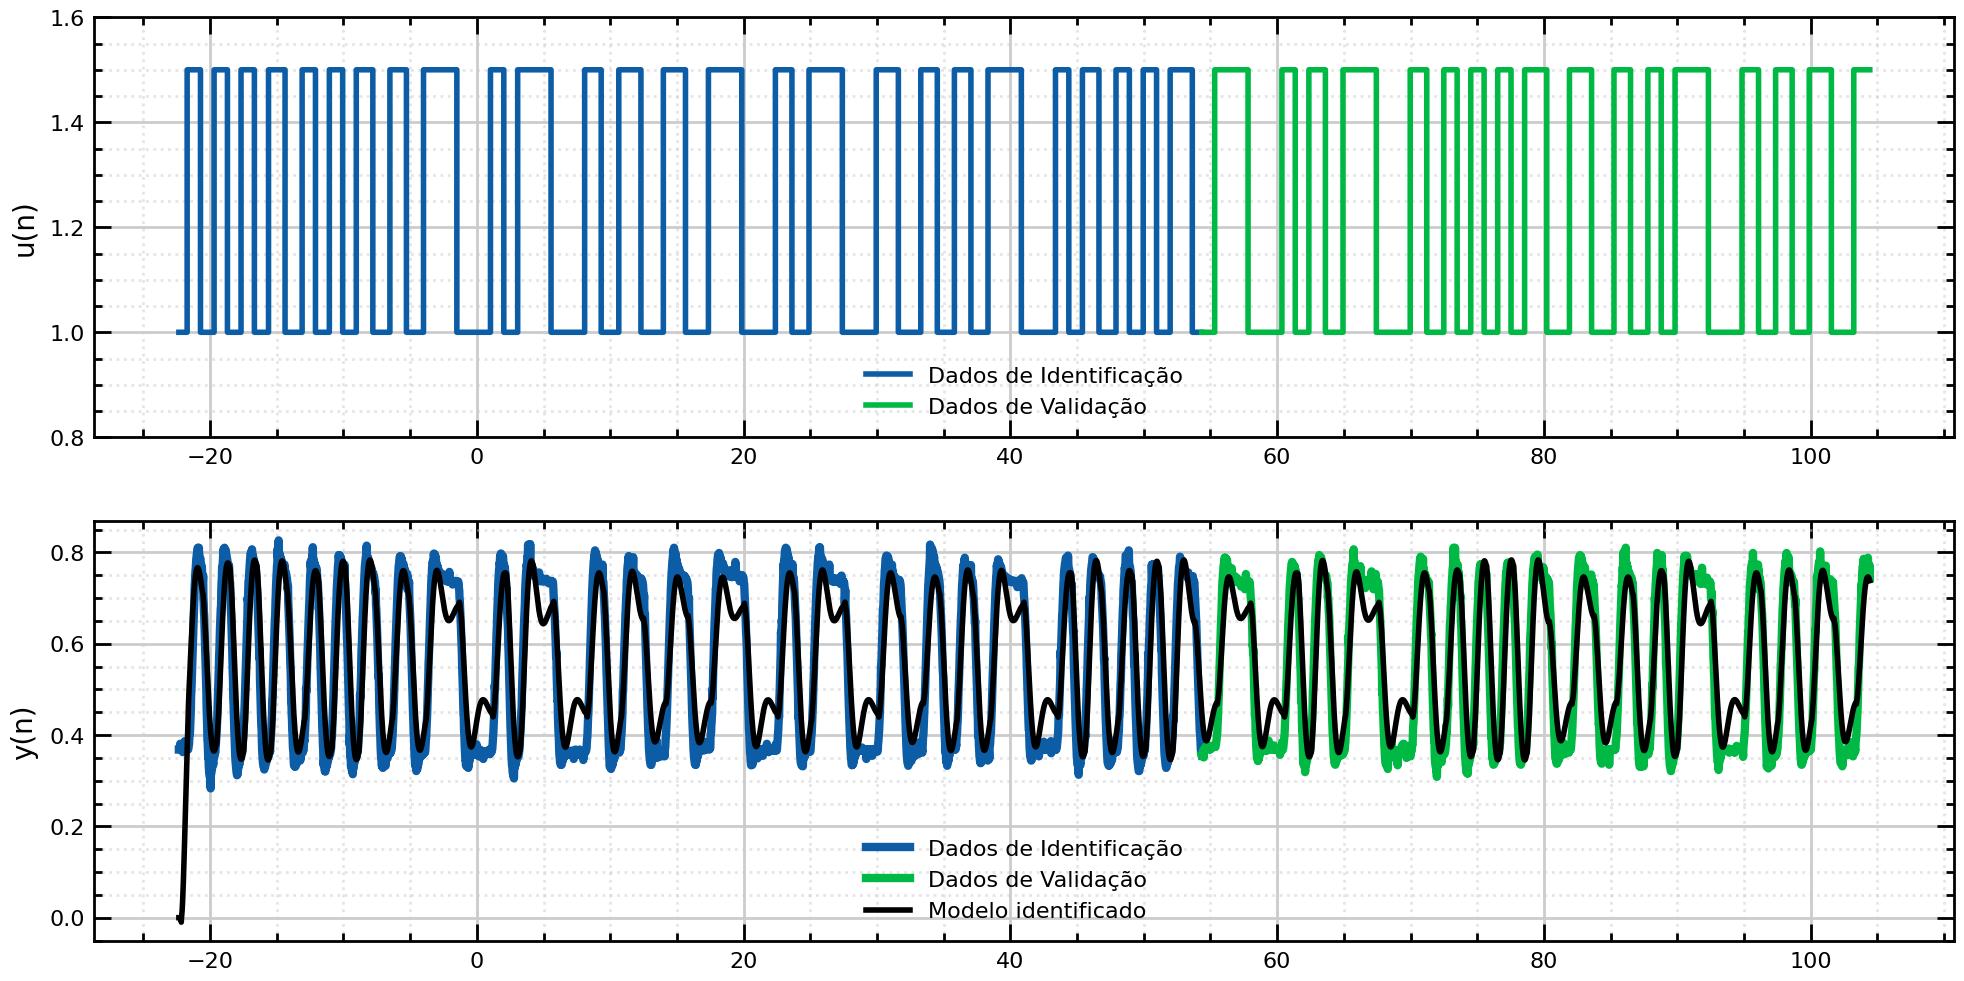

TransferFunction(array([-0.00335871, -0.00245693,  0.00276002,  0.01439076]), array([ 1.        , -0.67022762, -0.40239362, -0.19483699, -0.03040075,
        0.07364516,  0.08448662,  0.09063793,  0.10118527,  0.02810458,
       -0.05511044]), 0.01959477226483018)

In [24]:
a1, a2, a3, a4, a5, a6, a7, a8, a9, a10 = thetaA[:10]
b0, b1, b2, b3 = thetaA[10:]

Ba = [b0 , b1, b2, b3]
Aa = [1, -a1, -a2, -a3, -a4, -a5, -a6, -a7, -a8, -a9, -a10]

Gz = ct.tf(Ba, Aa, Ts)
_, yp = ct.forced_response(Gz, U=u1)

plt.figure(figsize = (12, 6))
plt.subplot(211)
plt.step(t[:Ni+1], u1[:Ni+1], label='Dados de Identificação')
plt.step(t[Ni:], u1[Ni:], label='Dados de Validação')
plt.yticks(np.arange(0.8, 1.8, 0.2))
plt.ylabel('u(n)')
plt.legend(loc="lower center")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)


plt.subplot(212)
plt.plot(t[:Ni+1], yout[:Ni+1], linewidth = 3.0, label='Dados de Identificação')
plt.plot(t[Ni:], yout[Ni:], linewidth = 3.0, label='Dados de Validação')
plt.plot(t, yp, 'k', label='Modelo identificado')
plt.legend(loc="lower center")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.ylabel('y(n)')
plt.show()

Gz

In [25]:
# Avaliação por NRMSE:
NRMSE = (1- np.sqrt(np.sum((yout[Ni:] - yp[Ni:])**2))/\
         np.sqrt(np.sum((yout[Ni:] - np.mean(yout[Ni:]))**2)))*100
print('\nAjuste: ', NRMSE.round(2),"%\n")


Ajuste:  60.59 %

